# Necessary packages

In [ ]:
import nltk
nltk.download('punkt')
import nltk.corpus
from nltk.text import Text, ConcordanceIndex, FreqDist
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('vader_lexicon')

import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Open text files

## The Guardian

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# open and read covid_news file
f = open("/content/drive/MyDrive/guardian_news.txt", "r")
guardian_raw = f.read()

In [ ]:
# other way to open files (without google drive)
f = open("guardian_news.txt", "r")
guardian_raw = f.read()

## BBC

In [ ]:
# open and read covid_news file
f = open("/content/drive/MyDrive/bbc_news.txt", "r")
bbc_raw = f.read()

In [ ]:
# other way to open files (without google drive)
f = open("bbc_news.txt", "r")
bbc_raw = f.read()

# Sentiment analysis of news

In [ ]:
# -*- coding: utf-8 -*-
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [ ]:
# obtaining a set stop words
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

def process_text(sentences):
    tokens = []
    for line in sentences:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)

    return tokens

## Sentiment analysis of sentences in The Guardian articles

In [ ]:
guardian_sentences = split_into_sentences(guardian_raw)

In [ ]:
guardian_sentences

['12:03  The UK government has admitted a health minister used private emails for government business despite denying it 24 hours earlier, but defended Lord Bethell, saying he had abided by the guidance.',
 'Bethell, a close ally of the former health secretary Matt Hancock, defended his use of email today.',
 'The comments contradicted the defence No 10 made yesterday, when the spokesman said “both the former health secretary and Lord Bethell understand the rules around personal email usage and only ever conducted government business through their departmental email addresses”.',
 'Bethell, who oversaw the award of Covid contracts, has faced calls for his resignation over his use of private email and his sponsorship of a parliamentary pass for Hancock’s aide Gina Coladangelo, with whom the former health secretary had an affair.',
 'On Monday, the Guardian revealed that a number of emails were copied into Bethell’s private email account.',
 'His address was copied into at least four off

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in guardian_sentences:
    pol_score = sia.polarity_scores(line)
    pol_score['sentence'] = line
    results.append(pol_score)

for i in range(3):
  print(results[i:i+1])

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.1823, 'sentence': '12:03  The UK government has admitted a health minister used private emails for government business despite denying it 24 hours earlier, but defended Lord Bethell, saying he had abided by the guidance.'}]
[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'sentence': 'Bethell, a close ally of the former health secretary Matt Hancock, defended his use of email today.'}]
[{'neg': 0.107, 'neu': 0.859, 'pos': 0.033, 'compound': -0.4767, 'sentence': 'The comments contradicted the defence No 10 made yesterday, when the spokesman said “both the former health secretary and Lord Bethell understand the rules around personal email usage and only ever conducted government business through their departmental email addresses”.'}]


In [ ]:
s_guar = pd.DataFrame.from_records(results)
s_guar['newspaper'] = 'The_Guardian'
s_guar.head(10)

,neg,neu,pos,compound,sentence,newspaper
0,0.000,0.914,0.086,0.1823,12:03 The UK government has admitted a health...,The_Guardian
1,0.000,1.000,0.000,0.0000,"Bethell, a close ally of the former health sec...",The_Guardian
2,0.107,0.859,0.033,-0.4767,The comments contradicted the defence No 10 ma...,The_Guardian
3,0.050,0.870,0.080,0.3182,"Bethell, who oversaw the award of Covid contra...",The_Guardian
4,0.000,0.920,0.080,0.0772,"On Monday, the Guardian revealed that a number...",The_Guardian
5,0.000,1.000,0.000,0.0000,His address was copied into at least four offi...,The_Guardian
6,0.000,1.000,0.000,0.0000,"In April 2020, the businessman had approached ...",The_Guardian
7,0.000,0.759,0.241,0.9428,The hope was that schools could stagger on for...,The_Guardian
8,0.312,0.574,0.115,-0.6666,But three weeks before the holidays in most En...,The_Guardian
9,0.000,1.000,0.000,0.0000,"Cases are rising, as are closures, with offici...",The_Guardian


In [ ]:
# recoding classification into 3 categories (treshold for negative is <-0.2 and for positive is 0.3<)
s_guar['label'] = 0
s_guar.loc[s_guar['compound'] > 0.3, 'label'] = 1
s_guar.loc[s_guar['compound'] < -0.2, 'label'] = -1
s_guar.head(10)

,neg,neu,pos,compound,sentence,newspaper,label
0,0.000,0.914,0.086,0.1823,12:03 The UK government has admitted a health...,The_Guardian,0
1,0.000,1.000,0.000,0.0000,"Bethell, a close ally of the former health sec...",The_Guardian,0
2,0.107,0.859,0.033,-0.4767,The comments contradicted the defence No 10 ma...,The_Guardian,-1
3,0.050,0.870,0.080,0.3182,"Bethell, who oversaw the award of Covid contra...",The_Guardian,1
4,0.000,0.920,0.080,0.0772,"On Monday, the Guardian revealed that a number...",The_Guardian,0
5,0.000,1.000,0.000,0.0000,His address was copied into at least four offi...,The_Guardian,0
6,0.000,1.000,0.000,0.0000,"In April 2020, the businessman had approached ...",The_Guardian,0
7,0.000,0.759,0.241,0.9428,The hope was that schools could stagger on for...,The_Guardian,1
8,0.312,0.574,0.115,-0.6666,But three weeks before the holidays in most En...,The_Guardian,-1
9,0.000,1.000,0.000,0.0000,"Cases are rising, as are closures, with offici...",The_Guardian,0


In [ ]:
print(s_guar[s_guar['label'] != 0]['label'].value_counts())

-1    469
 1    444
Name: label, dtype: int64


In [ ]:
# now we normalize data
counts_guar = s_guar[s_guar['label'] != 0]['label'].value_counts(normalize=True)
print(counts_guar)

-1    0.513691
 1    0.486309
Name: label, dtype: float64


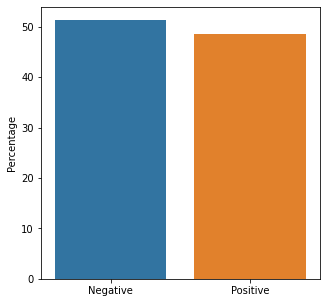

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=counts_guar.index, y=counts_guar*100, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

## Sentiment analysis on words from 'The Guardian'

In [ ]:
news_g = nltk.word_tokenize(guardian_raw) # tokenize text file
news_guar = Text(news_g) # create NLTK text from a text file

### Positive sentiment

In [ ]:
pos_lines_guar = list(s_guar[s_guar.label == 1].sentence)
pos_tokens_guar = process_text(pos_lines_guar)
pos_freq_guar = nltk.FreqDist(pos_tokens_guar)

pos_freq_guar.most_common(20)


[('said', 60),
 ('people', 59),
 ('government', 47),
 ('care', 37),
 ('health', 33),
 ('would', 33),
 ('covid', 32),
 ('vaccine', 30),
 ('greater', 29),
 ('need', 28),
 ('support', 25),
 ('home', 24),
 ('sydney', 24),
 ('vaccination', 23),
 ('one', 23),
 ('public', 23),
 ('like', 23),
 ('new', 23),
 ('also', 21),
 ('work', 20)]

### Negative sentiment

In [ ]:
neg_lines_guar = list(s_guar[s_guar.label == -1].sentence)

neg_tokens_guar = process_text(neg_lines_guar)
neg_freq_guar = nltk.FreqDist(neg_tokens_guar)

neg_freq_guar.most_common(20)


[('covid', 76),
 ('said', 65),
 ('people', 64),
 ('government', 51),
 ('risk', 34),
 ('health', 30),
 ('pandemic', 30),
 ('would', 30),
 ('one', 28),
 ('19', 28),
 ('even', 26),
 ('new', 25),
 ('children', 24),
 ('vaccine', 24),
 ('year', 24),
 ('also', 23),
 ('public', 22),
 ('get', 22),
 ('australia', 21),
 ('school', 21)]

# China The Guardian

In [ ]:
news_guar.concordance('China')

Displaying 3 of 3 matches:
-wearing and the origins of Covid in China . “ Fauci is the villain here , ” Mo
so Bangladesh has recently turned to China and Russia for vaccines . The implem
armaceutical ingredient shipped from China ) . The program recently gained some


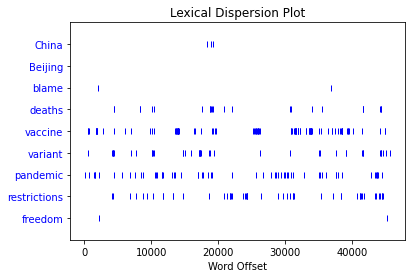

In [ ]:
news_guar.dispersion_plot(["China", "Beijing", "blame", "deaths", "vaccine", "variant", "pandemic", "restrictions", "freedom"])

## Sentiment analysis of sentences in BBC articles

In [ ]:
bbc_sentences = split_into_sentences(bbc_raw)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia_bbc = SIA()
results_bbc = []

for line in bbc_sentences:
    pol_score = sia_bbc.polarity_scores(line)
    pol_score['sentence'] = line
    results_bbc.append(pol_score)

for i in range(3):
  print(results_bbc[i:i+1])

[{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'compound': -0.6486, 'sentence': 'After India’s devastating second Covid wave, the country is now grappling with tens of thousands of cases of a rare fungal infection called mucormycosis.'}]
[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'sentence': 'The disease has been declared an epidemic in the nation.'}]
[{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.5574, 'sentence': 'Thousands have died of it.'}]


In [ ]:
s_bbc = pd.DataFrame.from_records(results_bbc)
s_bbc['newspaper'] = 'BBC'
s_bbc.head(10)

,neg,neu,pos,compound,sentence,newspaper
0,0.163,0.837,0.000,-0.6486,"After India’s devastating second Covid wave, t...",BBC
1,0.000,1.000,0.000,0.0000,The disease has been declared an epidemic in t...,BBC
2,0.474,0.526,0.000,-0.5574,Thousands have died of it.,BBC
3,0.000,1.000,0.000,0.0000,"Doctors say Covid, and the treatment being giv...",BBC
4,0.289,0.711,0.000,-0.6908,"From a public hospital in Pune, one of the wor...",BBC
5,0.000,1.000,0.000,0.0000,Filmed by Sanjay Ganguly.,BBC
6,0.000,1.000,0.000,0.0000,Produced and edited by Aakriti ThaparNeither t...,BBC
7,0.000,0.795,0.205,0.7351,"However, Balearic Islands Health Minister Patr...",BBC
8,0.000,1.000,0.000,0.0000,So far 26.,BBC
9,0.000,0.821,0.179,0.6124,1% of young people in quarantine had tested po...,BBC


In [ ]:
# recoding classification into 3 categories (treshold for negative is <-0.2 and for positive is 0.3<)
s_bbc['label'] = 0
s_bbc.loc[s_bbc['compound'] > 0.3, 'label'] = 1
s_bbc.loc[s_bbc['compound'] < -0.2, 'label'] = -1
s_bbc.head(10)

,neg,neu,pos,compound,sentence,newspaper,label
0,0.163,0.837,0.000,-0.6486,"After India’s devastating second Covid wave, t...",BBC,-1
1,0.000,1.000,0.000,0.0000,The disease has been declared an epidemic in t...,BBC,0
2,0.474,0.526,0.000,-0.5574,Thousands have died of it.,BBC,-1
3,0.000,1.000,0.000,0.0000,"Doctors say Covid, and the treatment being giv...",BBC,0
4,0.289,0.711,0.000,-0.6908,"From a public hospital in Pune, one of the wor...",BBC,-1
5,0.000,1.000,0.000,0.0000,Filmed by Sanjay Ganguly.,BBC,0
6,0.000,1.000,0.000,0.0000,Produced and edited by Aakriti ThaparNeither t...,BBC,0
7,0.000,0.795,0.205,0.7351,"However, Balearic Islands Health Minister Patr...",BBC,1
8,0.000,1.000,0.000,0.0000,So far 26.,BBC,0
9,0.000,0.821,0.179,0.6124,1% of young people in quarantine had tested po...,BBC,1


In [ ]:
print(s_bbc[s_bbc['label'] != 0]['label'].value_counts())

-1    120
 1    104
Name: label, dtype: int64


In [ ]:
# now we normalize data
counts_bbc = s_bbc[s_bbc['label'] != 0]['label'].value_counts(normalize=True)
print(counts_bbc)

-1    0.535714
 1    0.464286
Name: label, dtype: float64


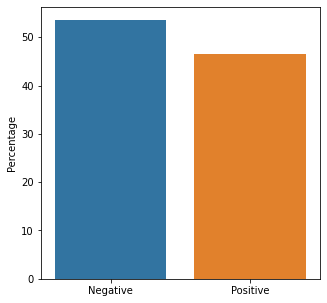

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=counts_bbc.index, y=counts_bbc*100, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

## Sentiment analysis on words from 'BBC'

In [ ]:
news_b = nltk.word_tokenize(bbc_raw) # tokenize text file
news_bbc = Text(news_b) # create NLTK text from a text file

### Positive sentiment

In [ ]:
pos_lines_bbc = list(s_bbc[s_bbc.label == 1].sentence)
pos_tokens_bbc = process_text(pos_lines_bbc)
pos_freq_bbc = nltk.FreqDist(pos_tokens_bbc)

pos_freq_bbc.most_common(20)


[('positive', 24),
 ('tests', 19),
 ('uk', 17),
 ('care', 16),
 ('covid', 13),
 ('people', 12),
 ('wales', 12),
 ('vaccine', 10),
 ('use', 9),
 ('homes', 9),
 ('health', 8),
 ('cases', 8),
 ('testing', 8),
 ('approved', 8),
 ('vaccines', 8),
 ('home', 8),
 ('said', 7),
 ('19', 7),
 ('two', 7),
 ('vaccination', 7)]

### Negative sentiment

In [ ]:
neg_lines_bbc = list(s_bbc[s_bbc.label == -1].sentence)

neg_tokens_bbc = process_text(neg_lines_bbc)
neg_freq_bbc = nltk.FreqDist(neg_tokens_bbc)

neg_freq_bbc.most_common(20)


[('covid', 30),
 ('deaths', 20),
 ('people', 16),
 ('death', 16),
 ('said', 14),
 ('19', 13),
 ('may', 12),
 ('virus', 10),
 ('wales', 10),
 ('second', 9),
 ('wave', 9),
 ('patients', 9),
 ('still', 9),
 ('also', 9),
 ('cause', 9),
 ('pandemic', 8),
 ('one', 7),
 ('coronavirus', 7),
 ('time', 7),
 ('areas', 7)]

# China BBC

In [ ]:
s_bbc[s_bbc['sentence'].str.contains('China')]['sentence']

167    The Sinovac, CanSino and Sinopharm vaccines ha...
168    Around one million people in China are reporte...
256    Quarantine was imposed on 273 people travellin...
257    Others from "high-risk countries" including Ch...
262                          China accounted for just 0.
Name: sentence, dtype: object

In [ ]:
news_bbc.concordance('China')

Displaying 5 of 5 matches:
have been developed by scientists in China and deals have signed with other cou
erica . Around one million people in China are reported to have been given the 
 273 people travelling from Wuhan in China , where the first outbreak was seen 
 `` high-risk countries '' including China , Iran and Northern Italy were asked
er of which faced any restrictions . China accounted for just 0.4 % of imported


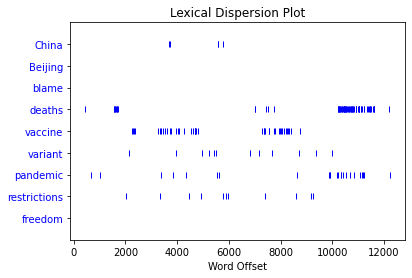

In [ ]:
news_bbc.dispersion_plot(["China", "Beijing", "blame", "deaths", "vaccine", "variant", "pandemic", "restrictions", "freedom"])

# Classification

## Data

In [ ]:
# DataFrame from guardian and bbc sentences
# column 'Sentence'
# dummy column 'Guradian' -> if sentence from guardian
df_guar = pd.DataFrame(guardian_sentences, columns=['Sentence'])
df_guar['Guardian'] = 1
df_bbc = pd.DataFrame(bbc_sentences, columns=['Sentence'])
df = df_guar.append(df_bbc).fillna(0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# count how often each word occurs in each sentence
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['Sentence'])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [ ]:
# split data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Guardian'], test_size=0.25, random_state=1000)


## Naive Bayes

In [ ]:
# Multinomial Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf = MultinomialNB().fit(X_train, y_train)

In [ ]:
# performance
print("Naive Bayes Classifier")
print("*"*25)
print("Training score: {:.4f}".format(clf.score(X_train, y_train)))
print("*"*25)
print("Accuracy score: {:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))
print("*"*25)

Naive Bayes Classifier
*************************
Training score: 0.8060
*************************
Accuracy score: 0.7798
*************************


# SVM

In [ ]:
# SVM classifier

from sklearn.linear_model import SGDClassifier

clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)
clf_svm.fit(X_train, y_train)
predicted_svm = clf_svm.predict(X_test)

In [ ]:
# performance
print("SVM Classifier")
print("*"*25)
print("Training score: {:.4f}".format(clf_svm.score(X_train, y_train)))
print("*"*25)
print("Accuracy score: {:.4f}".format(accuracy_score(y_test, clf_svm.predict(X_test))))
print("*"*25)

SVM Classifier
*************************
Training score: 0.8999
*************************
Accuracy score: 0.8543
*************************


# Conclusions

We conducted a sentiment analysis for 2 newspapers: "The Guardian" and  "BBC", both for words and for sentences. Additionally, we investigated the dispersion of the word "China" for both newspapers.

After that, we built a model that is able to predict from which newspaper is a given sentence. Our best classifier (SVM) showed an accuracy score equal to 85% on the test set and almost 90% on the training set. Naive Bayes classifier showed an accuracy score equal to 78% on the test set and almost 81% on the training set.